In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Soyabean_Volumes_Aggregated.xlsx to Soyabean_Volumes_Aggregated.xlsx


In [3]:
# Load the dataset
df = pd.read_excel('Soyabean_Volumes_Aggregated.xlsx')

In [4]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [6]:
# Create lagged variables for each feature to use as predictors
lags = range(1, 8)
for feature in df.columns:
    for lag in lags:
        df['{}_lag{}'.format(feature, lag)] = df[feature].shift(lag)

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# Split the dataset into training and testing sets
train_size = int(0.8 * len(df))
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

In [9]:
# Define the features and target variable
features = [col for col in df.columns if col != 'Modal Price_Soyabean']
X_train = df_train[features]
y_train = df_train['Soyabean_Vols']
X_test = df_test[features]
y_test = df_test['Soyabean_Vols']

In [10]:
# Create the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [11]:
# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [13]:
# Evaluate the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [14]:
print('MAE: {:.2f}'.format(mae))
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))

MAE: 15186.23
MSE: 553398564.46
RMSE: 23524.42


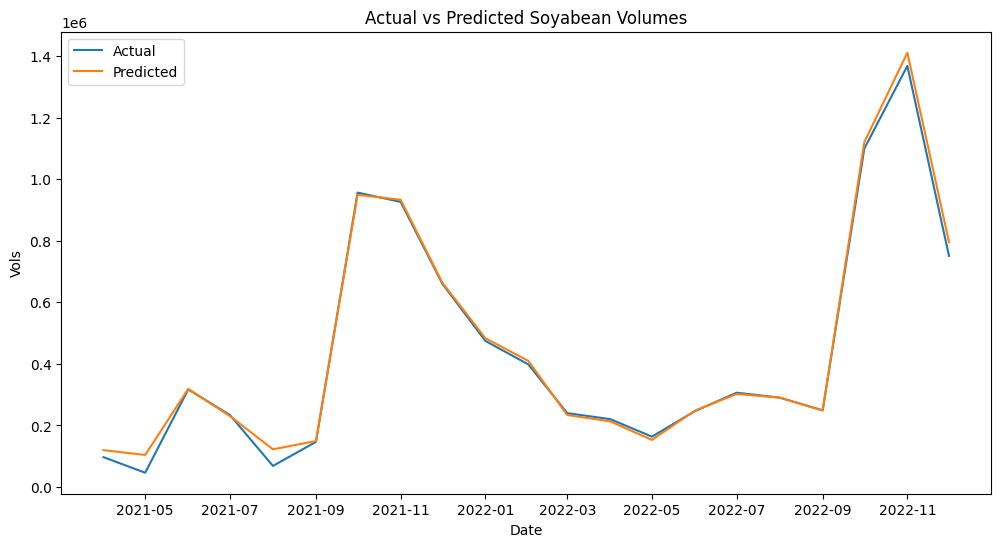

In [15]:
# Plot the actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Actual vs Predicted Soyabean Volumes')
plt.xlabel('Date')
plt.ylabel('Vols')
plt.legend()
plt.show()